In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

    Almost all the columns are in object form apart from Monthly charge, tenure and senior citizen.

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values here in the data

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We see here that most of the columns are categorical, as the total charge is in object there is a chance that the total charge is having special characters or blank values etc.,

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
num = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for i in range(len(cat)):
    print(df[cat[i]].value_counts())
    print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


No                     28

We already established that there are no null values, we can see the distribution of each categories in the result above. 
    

In [10]:
# checking for spl characters
for i in df['TotalCharges']:
    a = isinstance(i,int)
    if a == False:
        b = isinstance(i,float)
        if b == True: 
            print(i)

No value is retured as there are special characters in the data.

In [11]:
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As we now know that there are space values in the data, we will go ahead to replace with nan.

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 null values will get implemented with mean now.

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Let us go ahead and visualise the data now.

Male      3555
Female    3488
Name: gender, dtype: int64


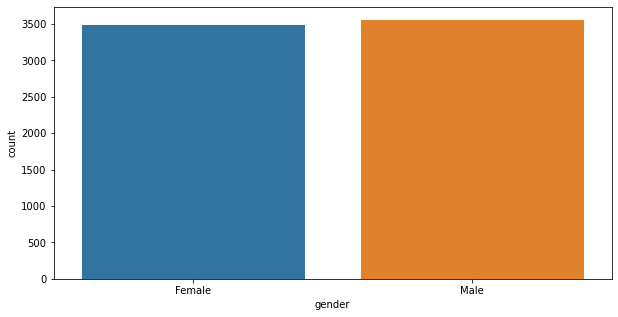

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


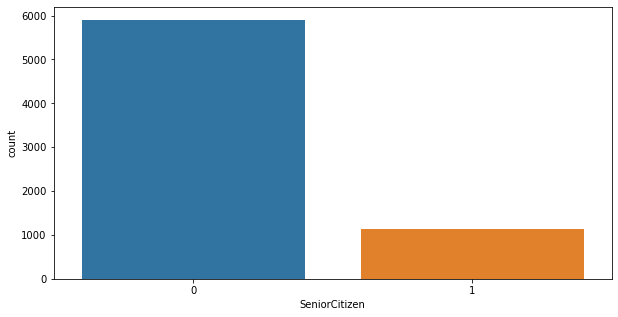

No     3641
Yes    3402
Name: Partner, dtype: int64


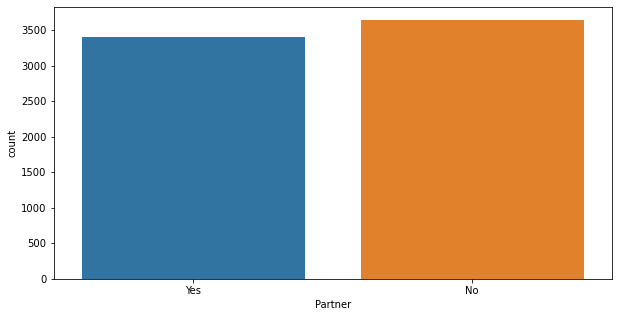

No     4933
Yes    2110
Name: Dependents, dtype: int64


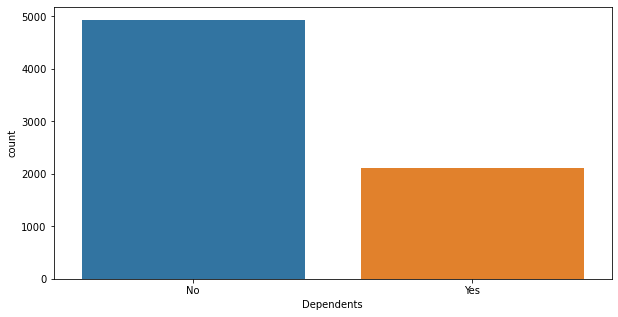

Yes    6361
No      682
Name: PhoneService, dtype: int64


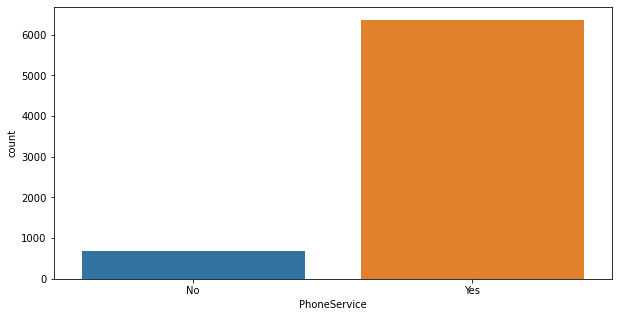

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


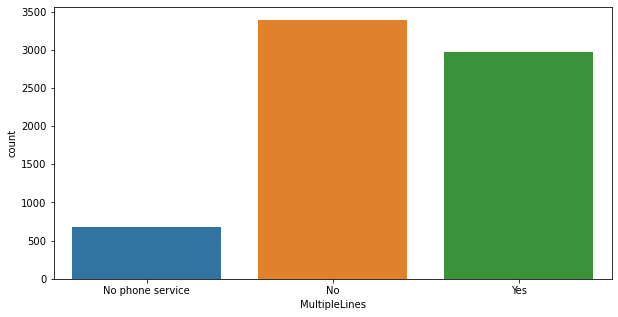

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


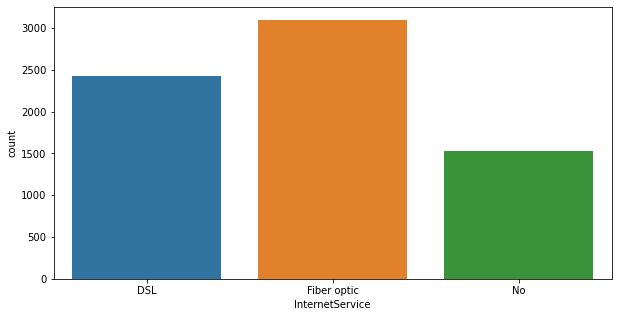

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


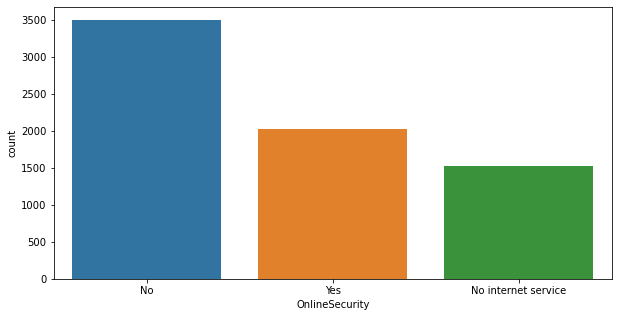

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


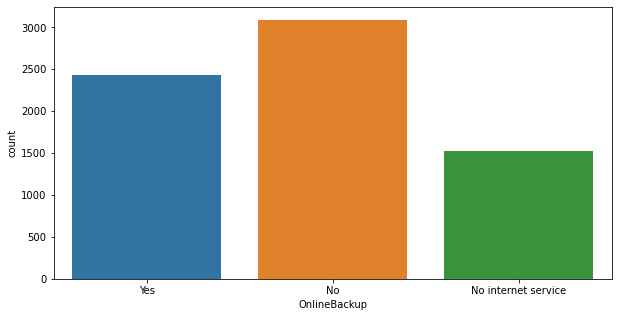

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


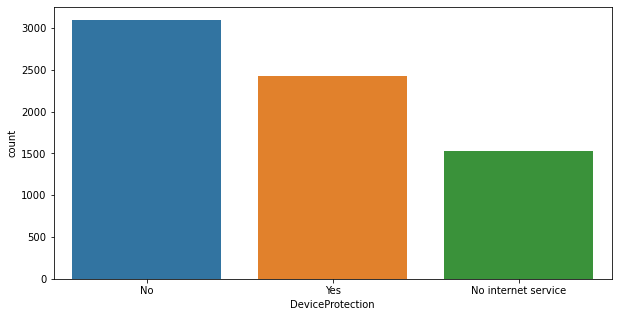

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


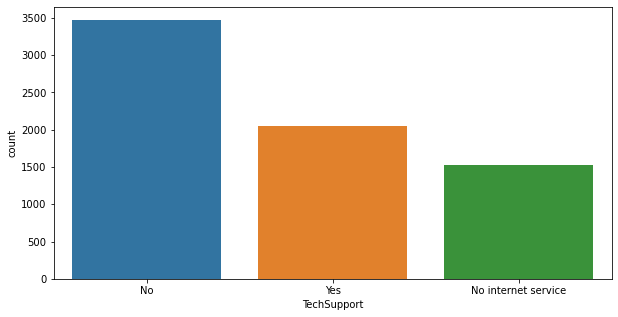

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


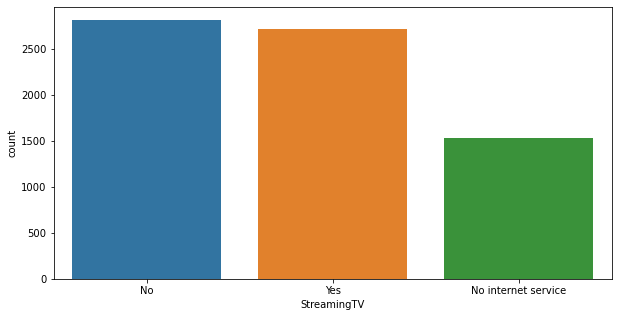

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


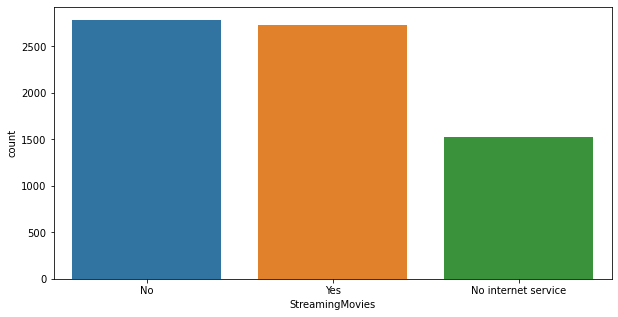

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


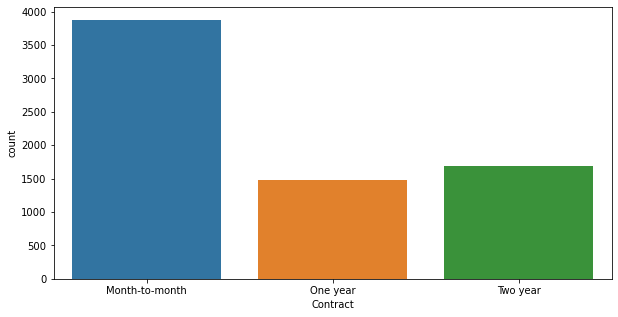

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


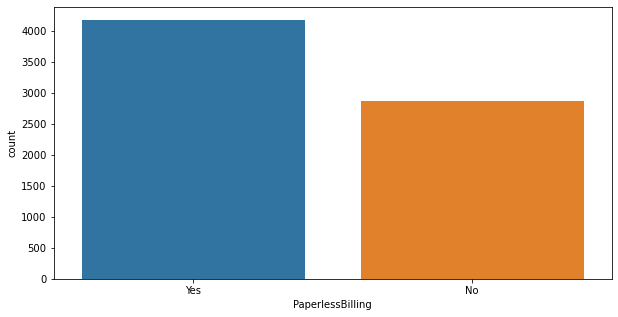

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


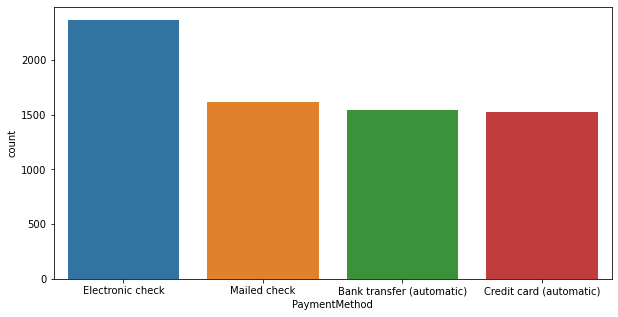

No     5174
Yes    1869
Name: Churn, dtype: int64


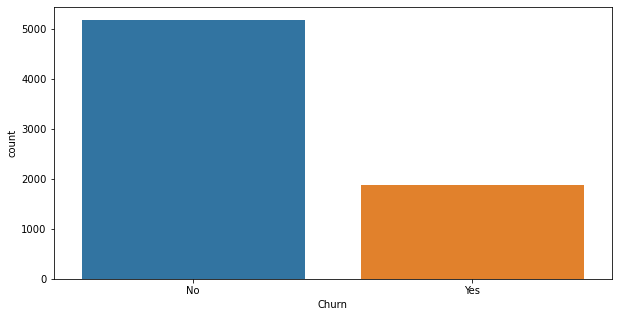

In [18]:
for i in cat: 
    plt.figure(figsize = (10,5))
    ax = sns.countplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()


    
    Male and female are equally distributed.
    
    There are low number of senior citizen compared to younger and the details are also mentioned with the graph.
    
    Partners and non partners are equally distributed.
    
    Number of people who churn are for dependants comparitively to others.
    
    People who have not are really low. 
    
    3096 people for Fiberoptics, 2421 for DSL while 1526 for no internet service.
    
    2019 people for OnlineSecurity, 3498 did not opt for it, and 1526 as always has no internet service. 
    
    2429 people for OnlineBackup while 3088 people did not. 
    
    2422 people for DeviceProtection while 3095 did not. 
    
    2044 people used for TechSupport while 3473 did not. 
    
    2707 people used StreamingTv while 2710 did not. 
    
    2732 people uses StreamingMovies while 2785 does not. 
    
    3875 people are on month-to-month contract, 1695 on two year contract and 1473 on yearly renewals. 
    
    4171   for PaperlessBilling while 2872 didn't. 
    
    2365  for Electronic check, 1612 for Mailed check, 1544 for Bank transfer (automatic), 1522 for CC.
    
    5174 did not Churn while 1869 turned to other operators. 

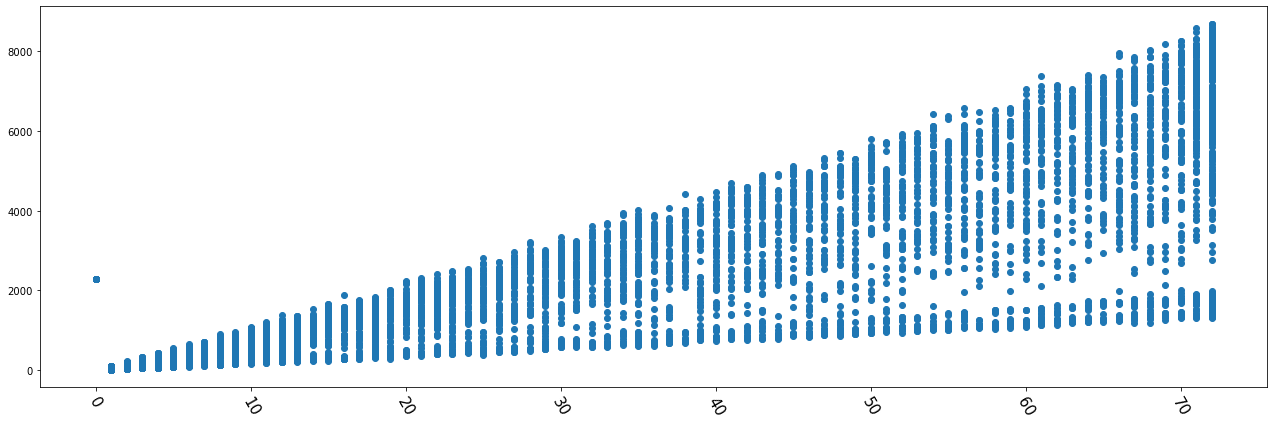

In [19]:
plt.figure(figsize = (22,7))
plt.scatter(x="tenure", y="TotalCharges", data = df)
plt.xticks(rotation = -60, fontsize = 15)
plt.show()

With the increase in tenurity, the number of charge increases ass well.

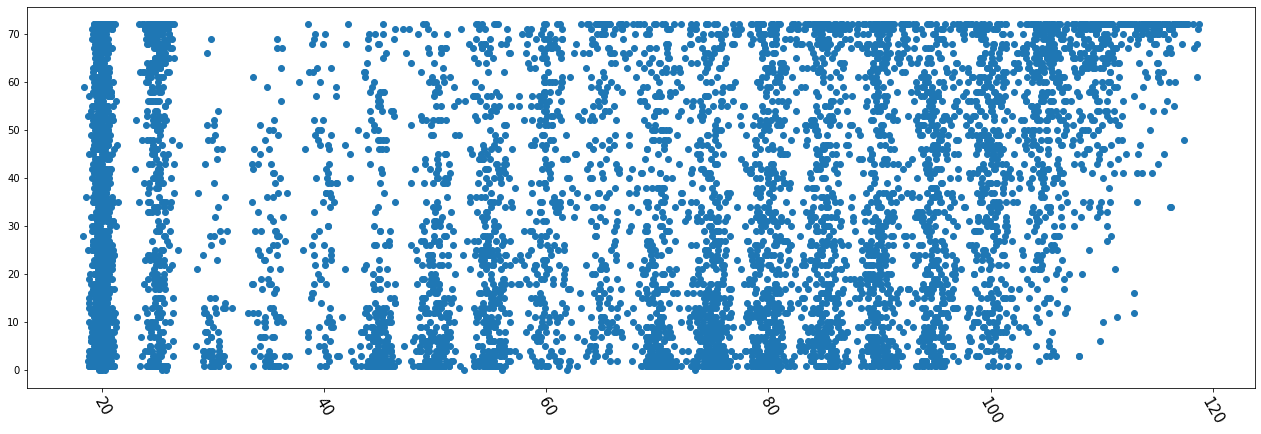

In [20]:
plt.figure(figsize = (22,7))
plt.scatter(x="MonthlyCharges", y="tenure", data = df)
plt.xticks(rotation = -60, fontsize = 15)
plt.show()

people start churning after 20 months.

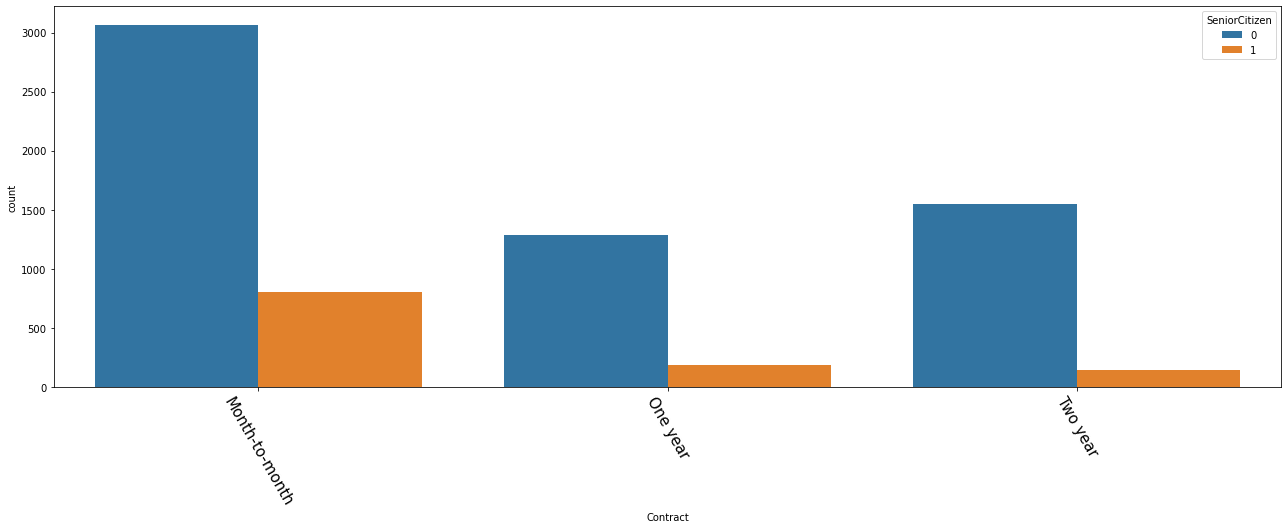

In [22]:
plt.figure(figsize = (22,7))
sns.countplot(x = 'Contract', hue ='SeniorCitizen', data = df)
plt.xticks(rotation = -60, fontsize = 15)
plt.show()

We see here that mostly, the month month connection is more rather than yearly.

Outliers

Using distplot

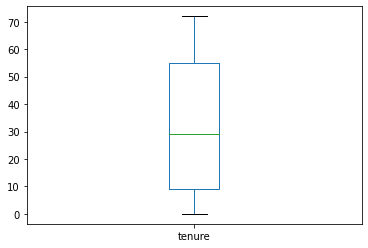

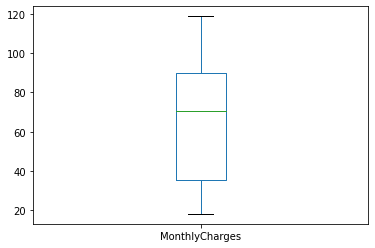

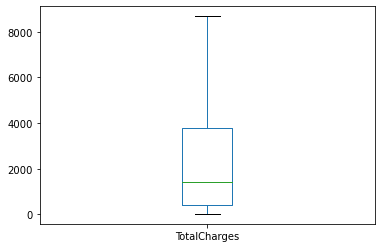

In [23]:
for i in num:
    df[i].plot.box()
    plt.show()

As there are no outliers we do not have to use the zscore and we can move ahead to check the skewness of the data.

Skewness

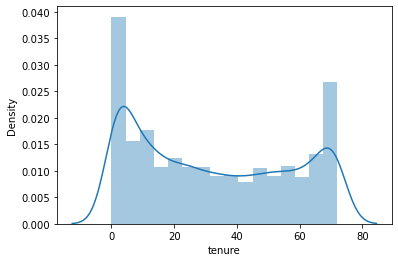

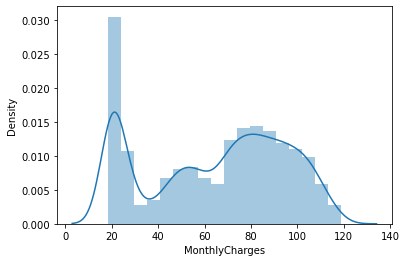

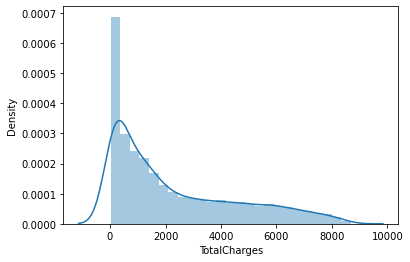

In [25]:
for i in num: 
    sns.distplot(df[i], kde = True)
    plt.show()

Just the senior citizen and Total charge seem to have skewness in the data.

In [26]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Confirmed the same using the skew command as well.

Encoding

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [28]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


Will have t scale the data here due to the total charge column.

In [30]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


We will remove customer ID as that is discreete and will not help the model, we are able to see here that in Monthly charge, there is a huge difference in the 75th and the maximum value.



Removing unwanted columns.

In [31]:
df=df.drop(columns='customerID')

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


Correlation

In [33]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

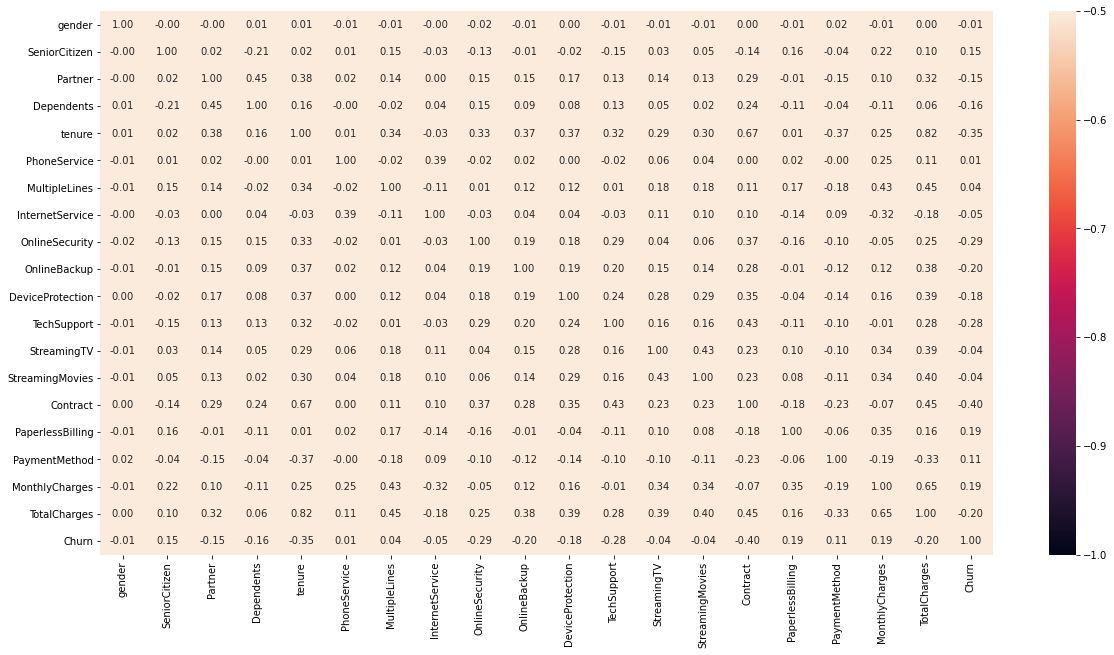

In [121]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

    We can see that there are no negative correlations between any columns. 

<AxesSubplot:>

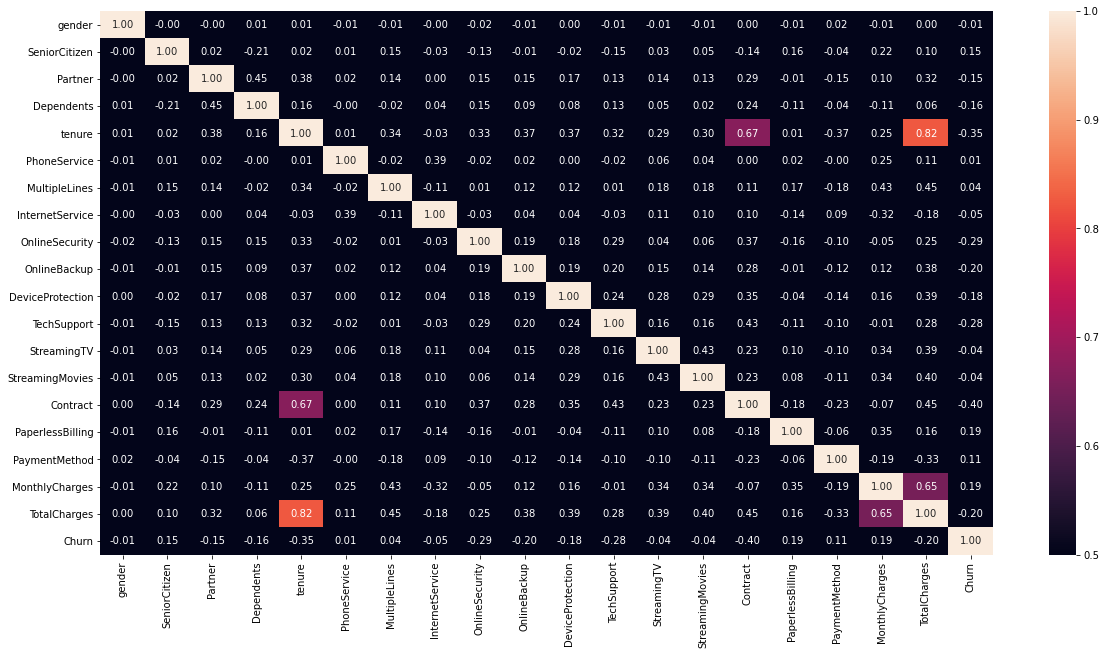

In [122]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

We have highlighted all the values greater than 0.5.
Also plotting the values having high correlation. 
  
There is high correlation between Tenure and total charge which we came to know from the above visualisation.

Also there is a correlation between monthly charge and total charge which was quite obvious.

Also between contract and tenure.

Split

In [34]:
x = df.drop(columns='Churn')
y = df['Churn']

In [35]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [36]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss = StandardScaler()

In [39]:
x = ss.fit_transform(x)

In [40]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [41]:
x = pd.DataFrame(x, columns = cols)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193


Modelling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 50)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [45]:
x_train.shape

(4930, 19)

In [46]:
y_train.shape

(4930,)

In [47]:
x_test.shape

(2113, 19)

In [48]:
y_test.shape

(2113,)

In [49]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  LogisticRegression()
0.795551348793185
[[1365  191]
 [ 241  316]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1556
         1.0       0.62      0.57      0.59       557

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy Score  :  GaussianNB()
0.7557974443918599
[[1165  391]
 [ 125  432]]
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1556
         1.0       0.52      0.78      0.63       557

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Accuracy Score  :  SVC()
0.7950780880265026
[[1409  147]
 [ 286  271]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1556
   

Cross validation.

In [50]:
from sklearn.model_selection import cross_val_score

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        
        test_accuracy = accuracy_score(y_test, pred)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LogisticRegression()
At cross fold 2 the cv score is 0.8013625878379436



At cross fold 3 the cv score is 0.8027831994980966



At cross fold 4 the cv score is 0.804061564322957



At cross fold 5 the cv score is 0.8023577125943608



At cross fold 6 the cv score is 0.8023582615279526



At cross fold 7 the cv score is 0.8042031538954667



At cross fold 8 the cv score is 0.8033507248993912



At cross fold 9 the cv score is 0.802216175862686



The model is: 
 GaussianNB()
At cross fold 2 the cv score is 0.7528040163335716



At cross fold 3 the cv score is 0.7522372006067165



At cross fold 4 the cv score is 0.7533727124309535



At cross fold 5 the cv score is 0.7533735039357377



At cross fold 6 the cv score is 0.7537990407875862



At cross fold 7 the cv score is 0.752520061923818



At cross fold 8 the cv score is 0.7523768831905892



At cross fold 9 the cv score is 0.7523770794341391



The model is: 
 SVC()
At cross fold 2 the cv score is 0.7934115111392164


Test = 78.8

at cv 7 at 79.2

### Re-running the best model

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

AUC ROC curve

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
y_pred_prob = lr.predict_proba(x_test)[:, 1]

In [57]:
y_pred_prob

array([0.27765344, 0.0182006 , 0.00214578, ..., 0.17097627, 0.1693411 ,
       0.56831222])

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [59]:
fpr

array([0.00000000e+00, 6.42673522e-04, 6.42673522e-04, 1.28534704e-03,
       1.28534704e-03, 1.92802057e-03, 1.92802057e-03, 2.57069409e-03,
       2.57069409e-03, 3.21336761e-03, 3.21336761e-03, 4.49871465e-03,
       4.49871465e-03, 5.78406170e-03, 5.78406170e-03, 6.42673522e-03,
       6.42673522e-03, 7.06940874e-03, 7.06940874e-03, 7.71208226e-03,
       7.71208226e-03, 8.35475578e-03, 8.35475578e-03, 8.99742931e-03,
       8.99742931e-03, 1.02827763e-02, 1.02827763e-02, 1.15681234e-02,
       1.15681234e-02, 1.22107969e-02, 1.22107969e-02, 1.28534704e-02,
       1.28534704e-02, 1.34961440e-02, 1.34961440e-02, 1.41388175e-02,
       1.41388175e-02, 1.47814910e-02, 1.47814910e-02, 1.54241645e-02,
       1.54241645e-02, 1.73521851e-02, 1.73521851e-02, 1.99228792e-02,
       1.99228792e-02, 2.05655527e-02, 2.05655527e-02, 2.12082262e-02,
       2.12082262e-02, 2.18508997e-02, 2.18508997e-02, 2.37789203e-02,
       2.37789203e-02, 2.57069409e-02, 2.57069409e-02, 2.63496144e-02,
      

In [60]:
tpr

array([0.        , 0.        , 0.03052065, 0.03052065, 0.03411131,
       0.03411131, 0.04667864, 0.04667864, 0.0556553 , 0.0556553 ,
       0.06104129, 0.06104129, 0.07540395, 0.07540395, 0.09694794,
       0.09694794, 0.1005386 , 0.1005386 , 0.1059246 , 0.1059246 ,
       0.10771993, 0.10771993, 0.11131059, 0.11131059, 0.12567325,
       0.12567325, 0.13824057, 0.13824057, 0.14003591, 0.14003591,
       0.15439856, 0.15439856, 0.15798923, 0.15798923, 0.15978456,
       0.15978456, 0.16696589, 0.16696589, 0.16876122, 0.16876122,
       0.17055655, 0.17055655, 0.17773788, 0.17773788, 0.18671454,
       0.18671454, 0.18850987, 0.18850987, 0.19030521, 0.19030521,
       0.19210054, 0.19210054, 0.1956912 , 0.1956912 , 0.19748654,
       0.19748654, 0.19928187, 0.20287253, 0.2064632 , 0.2064632 ,
       0.21364452, 0.21364452, 0.21543986, 0.21543986, 0.22441652,
       0.22441652, 0.22980251, 0.22980251, 0.23698384, 0.23698384,
       0.24057451, 0.24057451, 0.24416517, 0.24416517, 0.24775

In [61]:
thresholds

array([1.85026606e+00, 8.50266062e-01, 8.00437011e-01, 7.99934689e-01,
       7.96718789e-01, 7.93195445e-01, 7.71953577e-01, 7.71615435e-01,
       7.66943466e-01, 7.62302296e-01, 7.61009412e-01, 7.60450304e-01,
       7.54451539e-01, 7.52693856e-01, 7.45006373e-01, 7.44479333e-01,
       7.43958846e-01, 7.43901323e-01, 7.40914246e-01, 7.40341807e-01,
       7.38292386e-01, 7.37247979e-01, 7.36816117e-01, 7.36683131e-01,
       7.32078011e-01, 7.30707796e-01, 7.29130349e-01, 7.28506281e-01,
       7.28092265e-01, 7.28001455e-01, 7.23952883e-01, 7.23746971e-01,
       7.22993081e-01, 7.22763902e-01, 7.21873271e-01, 7.21786041e-01,
       7.21022433e-01, 7.20727803e-01, 7.19983514e-01, 7.19314842e-01,
       7.18110551e-01, 7.15978010e-01, 7.15194911e-01, 7.11784636e-01,
       7.10681376e-01, 7.10653785e-01, 7.09732489e-01, 7.08889832e-01,
       7.08549559e-01, 7.08212953e-01, 7.07780046e-01, 7.07006635e-01,
       7.05521736e-01, 7.02966595e-01, 7.02687184e-01, 7.02638681e-01,
      

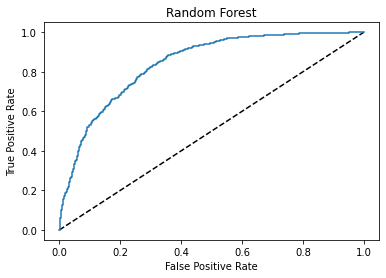

In [63]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.show()

In [64]:
auc_score = roc_auc_score(y_test, lr.predict(x_test))

In [65]:
print(auc_score)

0.7222871562215873


Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

param = {'criterion':['gini','entropy'],'max_features':['log2','auto','sqrt'], 'n_estimators' : [10,20,30, 40, 50],'min_samples_split' : [2,4,8]}

modeldtr = RandomForestClassifier()

grids = GridSearchCV(modeldtr,param,cv=7)


grid_result = grids.fit(x_train, y_train)


print(grids.best_params_)

print('Best Score: ', grid_result.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 40}
Best Score:  0.8048707055355993


In [67]:
rfc_final = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 40,min_samples_split=8)
rfc_final.fit(x_train, y_train)
pred_rfc = rfc_final.predict(x_test)
print('Accuracy Score  : ', rfc_final)
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuracy Score  :  RandomForestClassifier(criterion='entropy', min_samples_split=8,
                       n_estimators=40)
0.7917652626597255
[[1386  170]
 [ 270  287]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1556
         1.0       0.63      0.52      0.57       557

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



    We're getting 79.1% accuracy for the model

In [68]:
data = [pred_rfc, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

    Saving

In [70]:
import joblib
joblib.dump(pred_rfc, 'churnrf.obj')

['churnrf.obj']